In [80]:
import os
import shutil

import numpy as np
np.random.seed(1001)
import scipy

#### Audio
import wave                  # Python wav library
from scipy.io import wavfile # scipy wav library
#import librosa

import IPython
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook
from sklearn.model_selection import StratifiedKFold


import IPython.display as ipd  # To play sound in the notebook
%matplotlib inline
matplotlib.style.use('ggplot')

In [4]:
train = pd.read_csv("data/train.csv")
test  = pd.read_csv("data/sample_submission.csv")

data_train = "data/audio_train/"

In [4]:
train.head()

,fname,label,manually_verified
0,00044347.wav,Hi-hat,0
1,001ca53d.wav,Saxophone,1
2,002d256b.wav,Trumpet,0
3,0033e230.wav,Glockenspiel,1
4,00353774.wav,Cello,1


In [8]:
print("Number of training examples =", train.shape[0],
      "\tNumber of classes =", len(train.label.unique()))

Number of training examples = 9473 	Number of classes = 41


In [9]:
print(train.label.unique())

['Hi-hat' 'Saxophone' 'Trumpet' 'Glockenspiel' 'Cello' 'Knock'
 'Gunshot_or_gunfire' 'Clarinet' 'Computer_keyboard' 'Keys_jangling'
 'Snare_drum' 'Writing' 'Laughter' 'Tearing' 'Fart' 'Oboe' 'Flute' 'Cough'
 'Telephone' 'Bark' 'Chime' 'Bass_drum' 'Bus' 'Squeak' 'Scissors'
 'Harmonica' 'Gong' 'Microwave_oven' 'Burping_or_eructation' 'Double_bass'
 'Shatter' 'Fireworks' 'Tambourine' 'Cowbell' 'Electric_piano' 'Meow'
 'Drawer_open_or_close' 'Applause' 'Acoustic_guitar' 'Violin_or_fiddle'
 'Finger_snapping']


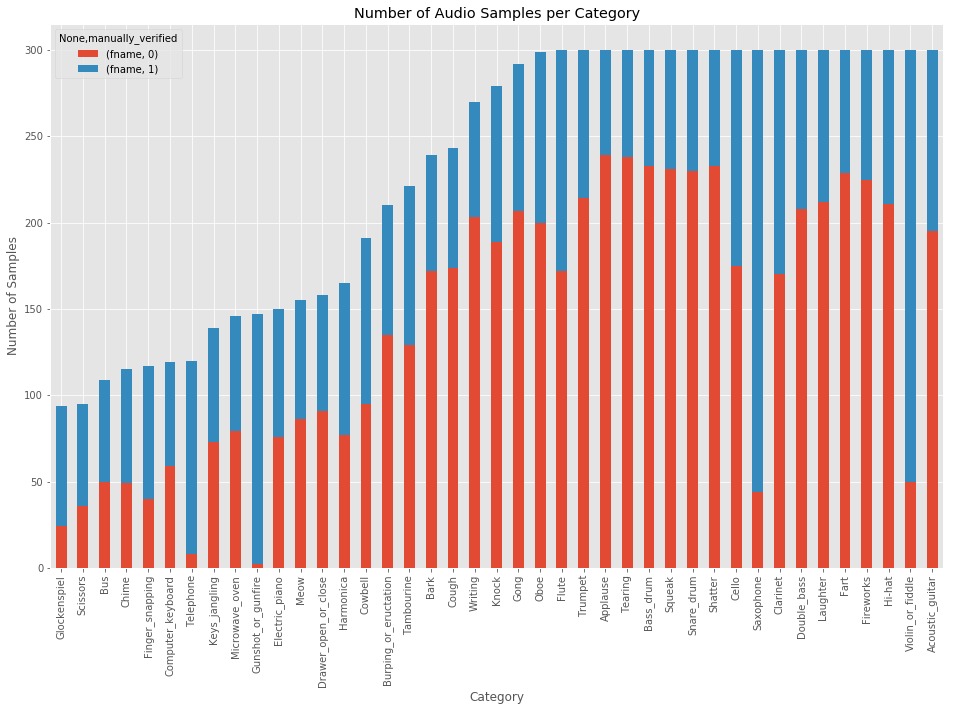

In [10]:
category_group = train.groupby(['label', 'manually_verified']).count()
plot = category_group.unstack().reindex(category_group.unstack().sum(axis=1).sort_values().index)\
          .plot(kind='bar', stacked=True, title="Number of Audio Samples per Category", figsize=(16,10))
plot.set_xlabel("Category")
plot.set_ylabel("Number of Samples");

In [5]:
fname = data_train + '00044347.wav'   # Hi-hat
ipd.Audio(fname)

In [44]:
# Using wave library
import wave
wav = wave.open(fname)
print("Sampling rate =", wav.getframerate(), "Hz (samples per sec)")
print("Total samples =", wav.getnframes())
print("Duration      =", wav.getnframes()/wav.getframerate(), "s")

Sampling rate = 44100 Hz (samples per sec)
Total samples = 617400
Duration      = 14.0 s


In [16]:
# Using scipy
rate, data = wavfile.read(fname)
print("Sampling (frame) rate = ", rate)
print("Total samples (frames) = ", data.shape)
print(data)

Sampling (frame) rate =  44100
Total samples (frames) =  (617400,)
[ 0 26 -5 ...  1  0  0]


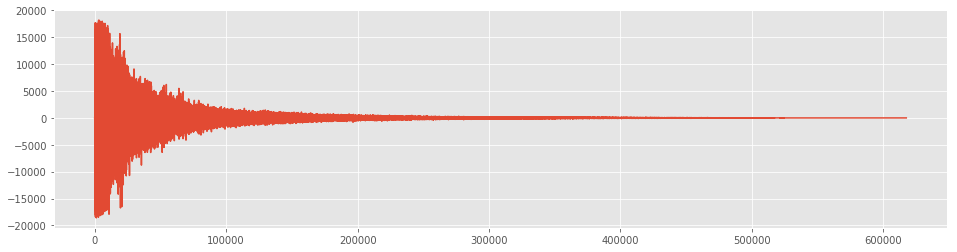

In [41]:
plt.figure(figsize=(16, 4))
plt.plot(data, '-', );

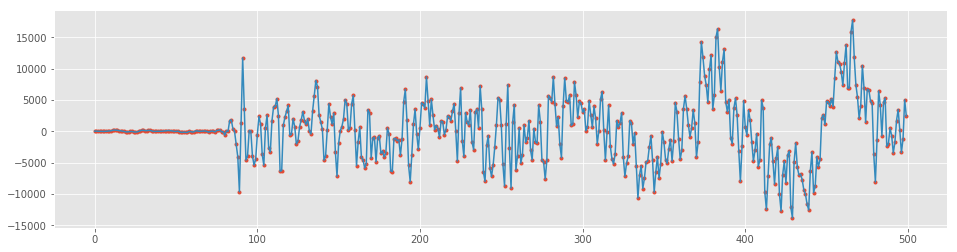

In [33]:
plt.figure(figsize=(16, 4))
plt.plot(data[:500], '.'); plt.plot(data[:500], '-');

In [45]:
## Audio lenght

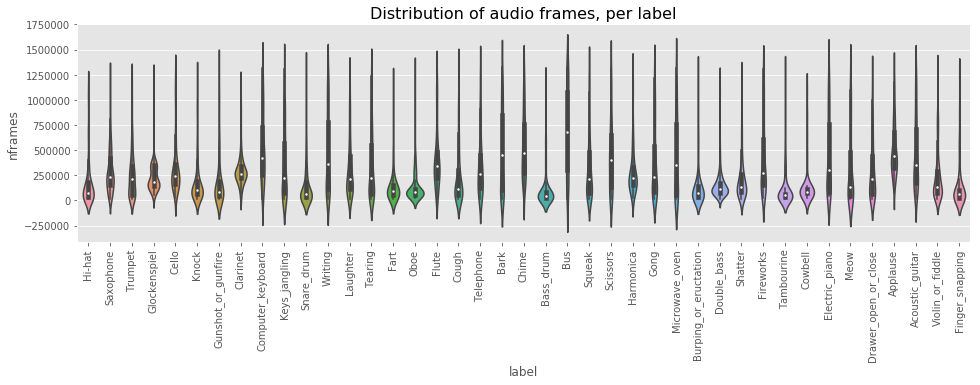

In [73]:
train['nframes'] = train['fname'].apply(lambda f: wave.open('data/audio_train/' + f).getnframes())
#test['nframes']  = test['fname'].apply(lambda f: wave.open('data/audio_test/'  + f).getnframes())

_, ax = plt.subplots(figsize=(16, 4))
sns.violinplot(ax=ax, x="label", y="nframes", data=train)
plt.xticks(rotation=90)
plt.title('Distribution of audio frames, per label', fontsize=16)
plt.show()

In [77]:
fart_files = train[train["label"]=="Cello"]["fname"][:10].values
fname = data_train + fart_files[2]
ipd.Audio(fname)

In [119]:
import torch
from torch.autograd import Variable

input = torch.randn(1)
#input = Variable(torch.randn(1), requires_grad=True)
input


-0.9326
[torch.FloatTensor of size 1]

In [120]:
input.shape # input.size()

torch.Size([1])

In [128]:
input.numpy()[0]

-0.93262625

In [134]:
#target = Variable(torch.LongTensor(3).random_(5))
target = torch.zeros(3,5)
value = input.numpy()[0]
target[:, 0] = value
target

RuntimeError: copy from numpy.float32 to torch.FloatTensor isn't implemented

In [102]:
loss  = torch.nn.CrossEntropyLoss()
output = loss(input, target)
output

Variable containing:
 1.6923
[torch.FloatTensor of size 1]

In [ ]:
output.backward()